# Applied Statistical Analysis CIE-3

### My Dataset
Games on Google Play Store
This is a dataset of top 100 games of each category of games on Google Play Store along with their ratings and other data like price and number of installs.

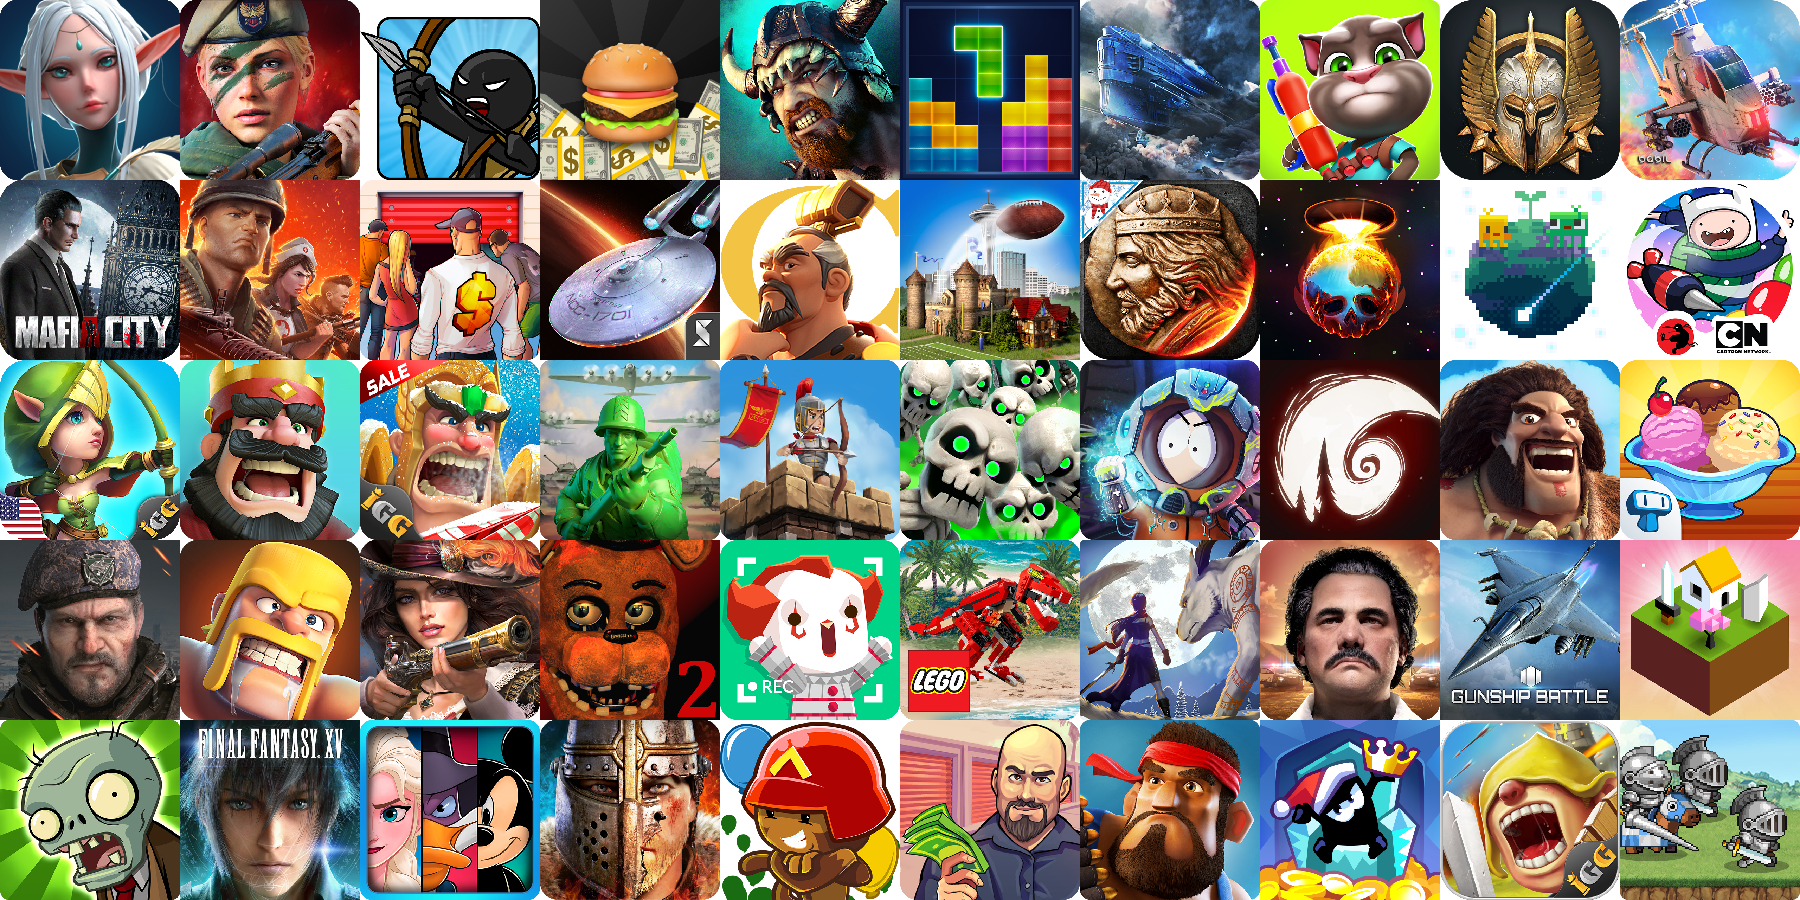

In [1]:
from IPython.display import Image
Image(filename='games.png',width=800, height=400)

### My Research Questions

#### 1.Which game category has the highest no of downloads?
#### 2.With respect to downloads and average ratings, which category holds the most number of popular games?
#### 3.What are the average ratings of games in free vs paid games?
#### 4.Which category of games has grown the most in the last 60 days? Is it similar to it's growth in 30 days?
#### 5.Which Category of games have the most number of negative reviews?
#### 6.Is there a relationship between average rating of a game and its growth in 30 days and 60 days?
#### 7.Which popular games have a majority of having done badly(1 star ratings are more then 5 star ratings)?
#### 8.Does the proportion of number of stars affect the Average Ratings of the game?
#### 9.Predicting the Average Rating with the proportion of 5 star and 1 star ratings

#### 1.Which game category has the highest no of downloads?

##### Importing the dataset

In [2]:
import numpy
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import plotly.express as px

In [3]:
games = pd.read_csv('android-games.csv', low_memory=False)

#### Let us take a glance of how the dataset looks

In [4]:
games.head()

rank                                         title  total ratings installs  \
0     1                  Garena Free Fire - The Cobra       80678661  500.0 M   
1     2                   PUBG MOBILE: Graffiti Prank       35971961  100.0 M   
2     3                     Mobile Legends: Bang Bang       25836869  100.0 M   
3     4                                   Brawl Stars       17181659  100.0 M   
4     5  Sniper 3D: Fun Free Online FPS Shooting Game       14237554  100.0 M   

   average rating  growth (30 days)  growth (60 days)  price     category  \
0            4.33               2.9               7.9    0.0  GAME ACTION   
1            4.24               2.0               3.1    0.0  GAME ACTION   
2            4.08               1.6               3.3    0.0  GAME ACTION   
3            4.27               4.1               6.6    0.0  GAME ACTION   
4            4.33               0.8               1.8    0.0  GAME ACTION   

   5 star ratings  4 star ratings  3 star ratings  2 star ratings  \
0        61935712         4478738         2795172         1814999   
1        26670566         2109631         1352610          893674   
2        17850942         1796761         1066095          725429   
3        12493668         1474319          741410          383478   
4         9657878         2124544         1034025          375159   

   1 star ratings   paid  
0         9654037  False  
1         4945478  False  
2         4397640  False  
3         2088781  False  
4         1045945  False

#### To find out the dimensions of our dataset, we can use the shape function

In [5]:
games.shape

(1730, 15)

#### This means we have 1730 rows and 15 columns in our dataset. Since we are not doing Analytics using Natural Language Processing,  the game title is of no use to us.
#### For our reference, let us find out the datatype of the columns

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
rank                1730 non-null int64
title               1730 non-null object
total ratings       1730 non-null int64
installs            1730 non-null object
average rating      1730 non-null float64
growth (30 days)    1730 non-null float64
growth (60 days)    1730 non-null float64
price               1730 non-null float64
category            1730 non-null object
5 star ratings      1730 non-null int64
4 star ratings      1730 non-null int64
3 star ratings      1730 non-null int64
2 star ratings      1730 non-null int64
1 star ratings      1730 non-null int64
paid                1730 non-null bool
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 191.0+ KB


#### From the above output, we can see that the dimension of each column is equal and all columns are non-null and also the datatypes are now known to us. If we want to check the number of null values in each column, we can use the following command

In [7]:
games.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

#### Now that we have understood the dataset, we can move on to doing Data Analytics on  our Data set

### EDA on Android games

#### Let us find out the number of paid games.

In [8]:
games[games['paid']==True] #selecting all rows in games, which are paid 

rank                  title  total ratings installs  average rating  \
91      92          Hitman Sniper         848831   10.0 M            4.41   
153     54               Terraria         317546    1.0 M            4.65   
211     12              Minecraft        3999232   10.0 M            4.54   
261     62          Geometry Dash         767518    1.0 M            4.62   
477     64                 Reigns         146504  500.0 k            4.58   
869     46               Cytus II         109687    1.0 M            4.59   
1588    65  Trivia Crack (No Ads)          74594  500.0 k            4.58   

      growth (30 days)  growth (60 days)  price        category  \
91                 0.3               0.8   0.99     GAME ACTION   
153                1.0               2.3   4.99  GAME ADVENTURE   
211                1.4               2.8   7.49     GAME ARCADE   
261                0.6               1.2   1.99     GAME ARCADE   
477                0.1               0.2   2.99       GAME CARD   
869                1.0               2.2   1.99      GAME MUSIC   
1588               0.9               2.2   1.99     GAME TRIVIA   

      5 star ratings  4 star ratings  3 star ratings  2 star ratings  \
91            607502          115334           48040           19224   
153           264563           24837           10184            4387   
211          3214765          312995          138682           70661   
261           623950           73997           25169            9705   
477           108627           25330            5696            2743   
869            86420           12246            4534            1999   
1588           55411           12625            3123            1117   

      1 star ratings  paid  
91             58729  True  
153            13572  True  
211           262126  True  
261            34694  True  
477             4105  True  
869             4484  True  
1588            2315  True

#### As we can see, there are a total of 7 paid games. This means there is a majority of free games

In [9]:
games['category'].value_counts()

GAME CARD            122
GAME WORD            106
GAME CASUAL          102
GAME MUSIC           100
GAME ACTION          100
GAME ADVENTURE       100
GAME CASINO          100
GAME STRATEGY        100
GAME RACING          100
GAME PUZZLE          100
GAME EDUCATIONAL     100
GAME BOARD           100
GAME SIMULATION      100
GAME TRIVIA          100
GAME SPORTS          100
GAME ARCADE          100
GAME ROLE PLAYING    100
Name: category, dtype: int64

In [10]:
paid_games = games[games['paid'] == True]
paid_games.describe()

rank  total ratings  average rating  growth (30 days)  \
count   7.000000   7.000000e+00        7.000000          7.000000   
mean   56.428571   8.948446e+05        4.567143          0.757143   
std    24.206453   1.404642e+06        0.077398          0.450397   
min    12.000000   7.459400e+04        4.410000          0.100000   
25%    50.000000   1.280955e+05        4.560000          0.450000   
50%    62.000000   3.175460e+05        4.580000          0.900000   
75%    64.500000   8.081745e+05        4.605000          1.000000   
max    92.000000   3.999232e+06        4.650000          1.400000   

       growth (60 days)     price  5 star ratings  4 star ratings  \
count          7.000000  7.000000    7.000000e+00        7.000000   
mean           1.671429  3.204286    7.087483e+05    82480.571429   
std            0.946422  2.270410    1.130571e+06   108543.298241   
min            0.200000  0.990000    5.541100e+04    12246.000000   
25%            1.000000  1.990000    9.752350e+04    18731.000000   
50%            2.200000  1.990000    2.645630e+05    25330.000000   
75%            2.250000  3.990000    6.157260e+05    94665.500000   
max            2.800000  7.490000    3.214765e+06   312995.000000   

       3 star ratings  2 star ratings  1 star ratings  
count        7.000000        7.000000        7.000000  
mean     33632.571429    15690.857143    54289.285714  
std      49027.945799    25051.010109    93948.601940  
min       3123.000000     1117.000000     2315.000000  
25%       5115.000000     2371.000000     4294.500000  
50%      10184.000000     4387.000000    13572.000000  
75%      36604.500000    14464.500000    46711.500000  
max     138682.000000    70661.000000   262126.000000

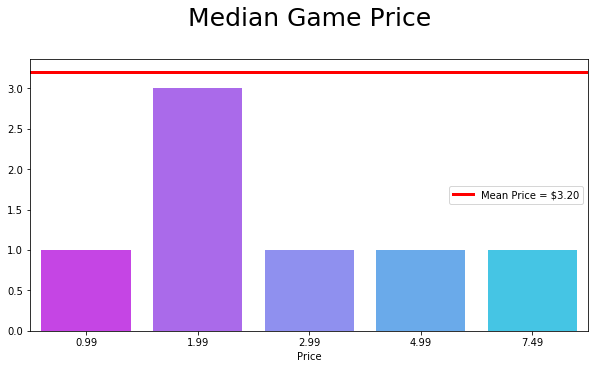

In [11]:
f, ax = plot.subplots(figsize = (10, 5))

sns.countplot(x = 'price',
              data = paid_games,
              palette = 'cool_r')

ax.set_title('Median Game Price',
             fontsize = 25,
             y = 1.1)

ax.set(ylabel = '',
       xlabel = 'Price')

ax.axhline(paid_games['price'].mean(),
          color = 'r',
          linewidth = 3,
          label = 'Mean Price = $3.20')

plot.legend()

In [12]:
games['installs'].value_counts()

10.0 M      795
50.0 M      266
5.0 M       248
100.0 M     203
1.0 M       191
500.0 k      13
500.0 M      10
1000.0 M      2
100.0 k       2
Name: installs, dtype: int64

#### In the above table, we can see that the installs are of object type. To conitnue with our analysis we must convert it to numerical type. We can do this by using the map function of the numpy library with will allow us to add a numerical column and map it according to the present data.

In [13]:
number_of_downloads = {'100.0 k' : 100000, '500.0 k' : 500000, '1.0 M' : 1000000, '5.0 M' : 5000000, '10.0 M' :10000000, '50.0 M' : 50000000, '100.0 M': 100000000,'500.0 M': 500000000, '1000.0 M': 1000000000,}
games['number_of_downloads'] = games['installs'].map(number_of_downloads)

#### Now let us see if our Dataset has the updated columns

In [14]:
games.head(1)

rank                         title  total ratings installs  average rating  \
0     1  Garena Free Fire - The Cobra       80678661  500.0 M            4.33   

   growth (30 days)  growth (60 days)  price     category  5 star ratings  \
0               2.9               7.9    0.0  GAME ACTION        61935712   

   4 star ratings  3 star ratings  2 star ratings  1 star ratings   paid  \
0         4478738         2795172         1814999         9654037  False   

   number_of_downloads  
0            500000000

#### Let us use the boxplot to see the average ratings grouped by category

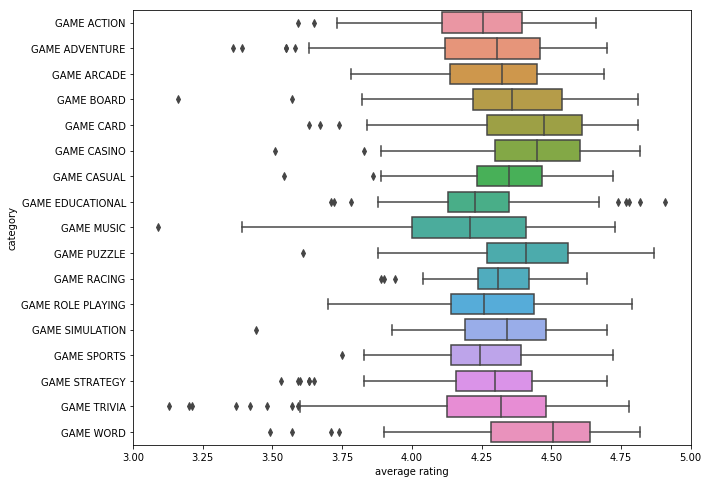

In [15]:
plot.figure(figsize=(10,8))
sns.boxplot(x='average rating', y='category', data = games)

#### The 'WORD' category of games has the highest median of 'average rating', and that of 'MUSIC' is the lowest. There are many outliers, especially in the category of 'TRIVIA'.  The game category of 'RACING' has the smallest box which means it has low variance. This shows us that the audience seem to have given similar ratings.

#### Rating Distribution of different types of games

In [16]:
import plotly.graph_objects as go

x = games['category']
fig = go.Figure(go.Bar(x=x, y=games['5 star ratings'], name='5 Star'))
fig.add_trace(go.Bar(x=x, y=games['4 star ratings'], name='4 Star'))
fig.add_trace(go.Bar(x=x, y=games['3 star ratings'], name='3 Star'))
fig.add_trace(go.Bar(x=x, y=games['2 star ratings'], name='2 Star'))
fig.add_trace(go.Bar(x=x, y=games['1 star ratings'], name='1 Star'))





fig.update_layout(barmode='stack',
                  title_text="Rating distribution of different types of game", xaxis = {'categoryorder':'total descending'})
fig.show()

#### Now that we have converted our column to  numerical type, we have completed the data manipulation section of our analysis, we can now find the answer to our Research Question

In [17]:
rq1=games.groupby(by='category')['number_of_downloads'].sum() #gets the total number of downloads per category

In [18]:
rq1.head(2)

category
GAME ACTION       6650000000
GAME ADVENTURE    1888000000
Name: number_of_downloads, dtype: int64

#### Let's sort our data according to number of downloads

In [19]:
rq1 = rq1.reset_index()
rq1 = rq1.sort_values(by= 'number_of_downloads')

In [20]:
rq1.head()

category  number_of_downloads
15  GAME TRIVIA            704100000
5   GAME CASINO            788500000
8    GAME MUSIC           1285600000
16    GAME WORD           1385000000
4     GAME CARD           1401000000

#### Now let us analyse the data using a barplot and find out the game category with the most installed number of games

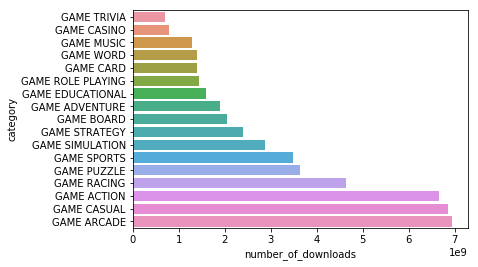

In [21]:
sns.barplot(y='category',x='number_of_downloads', data=rq1)

#### According to our plot, we can conclude that the Casual, Arcade, and Action based games are the most download category 
#### Trivia and casino are the least downloaded games

#### 2.With respect to downloads and average ratings, which category holds the most number of popular games?

#### Let us sort the dataset on the basis of its average ratings and the number of downloads

In [22]:
rq2 = games.sort_values(by= ['number_of_downloads', 'average rating'], ascending = False).head(200)


#### After the above step we group our data according to each category, and get the count of reviews and again sort them by the number of downloads

In [23]:
rq2=rq2.groupby(by='category')['number_of_downloads'].count().reset_index().sort_values(by='number_of_downloads', ascending=False)

#### Now all we need to do, is plot this using any plot to find out the most played game category now with a different filter

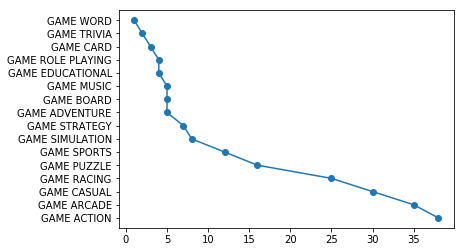

In [24]:
rq2 = games.sort_values(by = ['number_of_downloads','average rating'], ascending=False).head(200)
rq2=rq2.groupby(by = 'category')['number_of_downloads'].count().reset_index().sort_values(by = 'number_of_downloads', ascending=False)
plot.scatter(rq2['number_of_downloads'], rq2['category'])
plot.plot(rq2['number_of_downloads'], rq2['category'])

#### As we can see our result is not the same as it was before, now the most downloaded game belongs to the action category.

#### 3.What are the average ratings of games in free vs paid games?

#### To find the average ratings of free games vs paid games, we must find the mean(average) of either types of games and compare them

In [25]:
rq3free=games[(games['paid']==False)]
rq3paid=games[(games['paid']==True)]

In [26]:
freemean=rq3free['average rating'].mean()
paidmean=rq3paid['average rating'].mean()
print("The Average rating of free games are :",round(freemean,2))
print("The Average rating of paid games are :",round(paidmean,2))

The Average rating of free games are : 4.31
The Average rating of paid games are : 4.57


#### From  the above results we can conclude that the paid games, although being less in number, have a better average rating than free games

#### 4.Which category of games has grown the most in the last 60 days? Is it similar to its progress in 30 days?

In [27]:
rq430days = games.groupby(by = 'category')['growth (30 days)'].mean()
rq460days = games.groupby(by = 'category')['growth (60 days)'].mean()

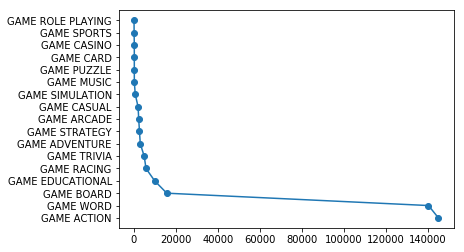

In [28]:
rq4 = games.sort_values(by = 'growth (30 days)', ascending=False).head(200)
rq4=rq4.groupby(by = 'category')['growth (30 days)'].sum().reset_index().sort_values(by = 'growth (30 days)', ascending=False)
plot.scatter(rq4['growth (30 days)'], rq4['category'])
plot.plot(rq4['growth (30 days)'], rq4['category'])

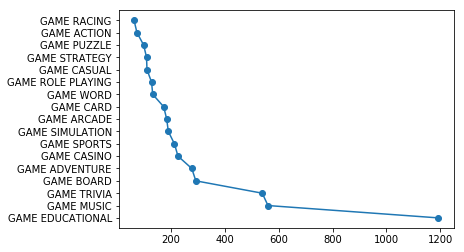

In [29]:
rq4 = games.sort_values(by = 'growth (60 days)', ascending=False).head(200)
rq4=rq4.groupby(by = 'category')['growth (60 days)'].sum().reset_index().sort_values(by = 'growth (60 days)', ascending=False)
plot.scatter(rq4['growth (60 days)'], rq4['category'])
plot.plot(rq4['growth (60 days)'], rq4['category'])

#### On analysing the above graphs we can see that not all games that have the same growth rate as it did during the first 30 days. We can see the in the first 30 days Action Category had the maximum growth rate whereas in the first 60 days, educational category of games had the maximum growth

#### 5.Which Category of games have the most number of negative reviews?

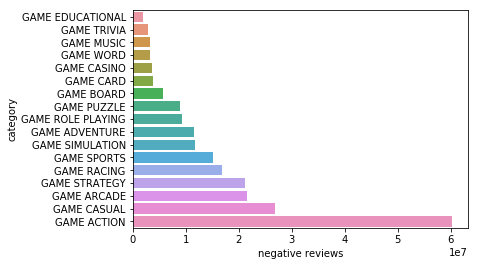

In [30]:
games['negative reviews'] = games['1 star ratings']+games['2 star ratings']
rq5=games.groupby(by='category')['negative reviews'].sum()
rq5 = rq5.reset_index()
rq5 = rq5.sort_values(by= 'negative reviews')
sns.barplot(y='category',x='negative reviews', data=rq5)

#### We can see that Action Based games have the most negative ratings/reviews 

#### 6.Is there a relationship between average rating of a game and its growth in 30 days and 60 days?

In [31]:
columnA=games['average rating']
columnB=games['growth (30 days)']
correlation = columnA.corr(columnB)
print(correlation)

-0.0029918367148512367


#### Since there is a negative relationship, we can conclude that average ratings,decreases with increase in number of days(till 30 days). This conclusion was drawn by calculating the Pearson Correlation betwen the two columns. When we get a value < 0 it means we have a negative correlation.

In [32]:
columnA=games['average rating']
columnB=games['growth (60 days)']
correlation = columnA.corr(columnB)
print(correlation)

0.03883972330950884


#### Since there is a positive relationship, we can conclude that average ratings,increase with increase in number of days(till 60 days). This conclusion was drawn by calculating the Pearson Correlation betwen the two columns. When we get a value > 0 it means we have a positive correlation.

#### 7.Which popular games have a majority of 1 star ratings?

In [33]:
games['More 1 stars than 5 (Percentage)'] = ((games['1 star ratings'] / games['5 star ratings']) * 100).astype(float)

In [34]:
games.sort_values(by=['More 1 stars than 5 (Percentage)'], ascending=False).head(10)

rank                                              title  total ratings  \
873     50                 Au Mobile VTC – Game nhảy Audition         103881   
1592    69                                      NEW QuizDuel!          65544   
1590    67                                              스케치퀴즈          65734   
304      5                                              모두의마블        1596758   
1606    83  TopQuiz -Play Quiz & Lottery | Win Money via P...          55050   
143     44                                      Ingress Prime         426482   
132     33                   Knives Out-No rules, just fight!         526011   
1576    53  Live Quiz Games App, Trivia & Gaming App for M...         106880   
1579    56                                  Guess The Movie ®          94798   
904     81                                         BeatEVO YG          50085   

     installs  average rating  growth (30 days)  growth (60 days)  price  \
873     5.0 M            3.09               0.1               0.3    0.0   
1592    1.0 M            3.21               7.4              17.8    0.0   
1590    5.0 M            3.13               0.0               0.0    0.0   
304    10.0 M            3.16               0.0               0.0    0.0   
1606    1.0 M            3.20               0.1               0.4    0.0   
143    10.0 M            3.36               0.3               0.7    0.0   
132    10.0 M            3.39               0.5               1.0    0.0   
1576   10.0 M            3.42               0.0               0.0    0.0   
1579    1.0 M            3.37               0.2               0.3    0.0   
904     1.0 M            3.39               0.0               0.1    0.0   

            category  5 star ratings  4 star ratings  3 star ratings  \
873       GAME MUSIC           44324            6906            6996   
1592     GAME TRIVIA           24833           11671            3568   
1590     GAME TRIVIA           25093            6939            6959   
304       GAME BOARD          666378          138474          141241   
1606     GAME TRIVIA           24578            4760            2971   
143   GAME ADVENTURE          188123           53049           33512   
132   GAME ADVENTURE          260354           40125           34962   
1576     GAME TRIVIA           54382            8965            5455   
1579     GAME TRIVIA           31819           18522           15734   
904       GAME MUSIC           22571            4851            4981   

      2 star ratings  1 star ratings   paid  number_of_downloads  \
873             5536           40117  False              5000000   
1592            3499           21970  False              1000000   
1590            4763           21977  False              5000000   
304            89312          561350  False             10000000   
1606            2454           20284  False              1000000   
143            26380          125415  False             10000000   
132            24636          165933  False             10000000   
1576            3630           34446  False             10000000   
1579            9990           18731  False              1000000   
904             4751           12928  False              1000000   

      negative reviews  More 1 stars than 5 (Percentage)  
873              45653                         90.508528  
1592             25469                         88.470986  
1590             26740                         87.582194  
304             650662                         84.238975  
1606             22738                         82.529091  
143             151795                         66.666489  
132             190569                         63.733609  
1576             38076                         63.340811  
1579             28721                         58.867343  
904              17679                         57.277037

#### From the obtained results above it is very clear to us that Au Mobile VTC – Game nhảy Audition has a majority of one star ratings

#### 8.Does the proportion of number of stars affect the Average Ratings of the game?

In [35]:
games['proportion of 5 star rating'] = games['5 star ratings'] / games['total ratings']
games['proportion of 4 star rating'] = games['4 star ratings'] / games['total ratings']
games['proportion of 3 star rating'] = games['3 star ratings'] / games['total ratings']
games['proportion of 2 star rating'] = games['2 star ratings'] / games['total ratings']
games['proportion of 1 star rating'] = games['1 star ratings'] / games['total ratings']

In [36]:
games.describe()

rank  total ratings  average rating  growth (30 days)  \
count  1730.000000   1.730000e+03     1730.000000       1730.000000   
mean     50.475723   1.101182e+06        4.313410        193.167341   
std      28.941630   3.311738e+06        0.253545       4775.617650   
min       1.000000   3.823800e+04        3.090000          0.000000   
25%      25.000000   1.879988e+05        4.180000          0.100000   
50%      51.000000   4.576750e+05        4.330000          0.500000   
75%      75.750000   9.443342e+05        4.490000          1.600000   
max     100.000000   8.067866e+07        4.910000     140394.400000   

       growth (60 days)        price  5 star ratings  4 star ratings  \
count       1730.000000  1730.000000    1.730000e+03    1.730000e+03   
mean           3.969249     0.012965    7.883837e+05    1.216466e+05   
std           18.912904     0.243492    2.483061e+06    2.955701e+05   
min            0.000000     0.000000    2.189800e+04    2.441000e+03   
25%            0.300000     0.000000    1.358290e+05    2.180200e+04   
50%            1.000000     0.000000    3.109435e+05    5.464350e+04   
75%            3.300000     0.000000    6.511310e+05    1.095648e+05   
max          605.100000     7.490000    6.193571e+07    5.397273e+06   

       3 star ratings  2 star ratings  1 star ratings  number_of_downloads  \
count    1.730000e+03    1.730000e+03    1.730000e+03         1.730000e+03   
mean     5.954986e+04    2.796247e+04    1.036364e+05         2.889462e+07   
std      1.447400e+05    7.676625e+04    3.589869e+05         5.810044e+07   
min      7.070000e+02    2.880000e+02    5.270000e+02         1.000000e+05   
25%      1.027775e+04    4.529500e+03    1.356075e+04         5.000000e+06   
50%      2.665850e+04    1.133050e+04    3.569400e+04         1.000000e+07   
75%      5.581750e+04    2.526650e+04    8.632625e+04         5.000000e+07   
max      2.795172e+06    1.814999e+06    9.654037e+06         1.000000e+09   

       negative reviews  More 1 stars than 5 (Percentage)  \
count      1.730000e+03                       1730.000000   
mean       1.315988e+05                         13.969692   
std        4.342361e+05                         10.042806   
min        8.150000e+02                          0.593686   
25%        1.842150e+04                          7.129061   
50%        4.722150e+04                         12.099472   
75%        1.112700e+05                         17.740322   
max        1.146904e+07                         90.508528   

       proportion of 5 star rating  proportion of 4 star rating  \
count                  1730.000000                  1730.000000   
mean                      0.703442                     0.119908   
std                       0.095469                     0.045281   
min                       0.259188                     0.028889   
25%                       0.655325                     0.090784   
50%                       0.705576                     0.112076   
75%                       0.753709                     0.140297   
max                       2.220635                     0.626739   

       proportion of 3 star rating  proportion of 2 star rating  \
count                  1730.000000                  1730.000000   
mean                      0.058968                     0.027148   
std                       0.020924                     0.011940   
min                       0.009100                     0.002351   
25%                       0.045546                     0.018371   
50%                       0.057440                     0.025971   
75%                       0.069555                     0.033963   
max                       0.177859                     0.105382   

       proportion of 1 star rating  
count                  1730.000000  
mean                      0.092016  
std                       0.052124  
min                       0.005602  
25%                       0.052386  
50%                       0.085328  
75%  

#### Now that we have added the proportion of each rating, we need to check if it fits our question. Our question deals with proportions which are always between 0 and 1. But as we can see from the table the maximum value is 2.220635. We don't need values exceeding 1. We remove them and we also don't need the original ratings columns so we drop them as well

In [37]:
df = games
df = df[df['proportion of 5 star rating']<=1]
df=df.drop(['5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings', '1 star ratings'], axis=1)

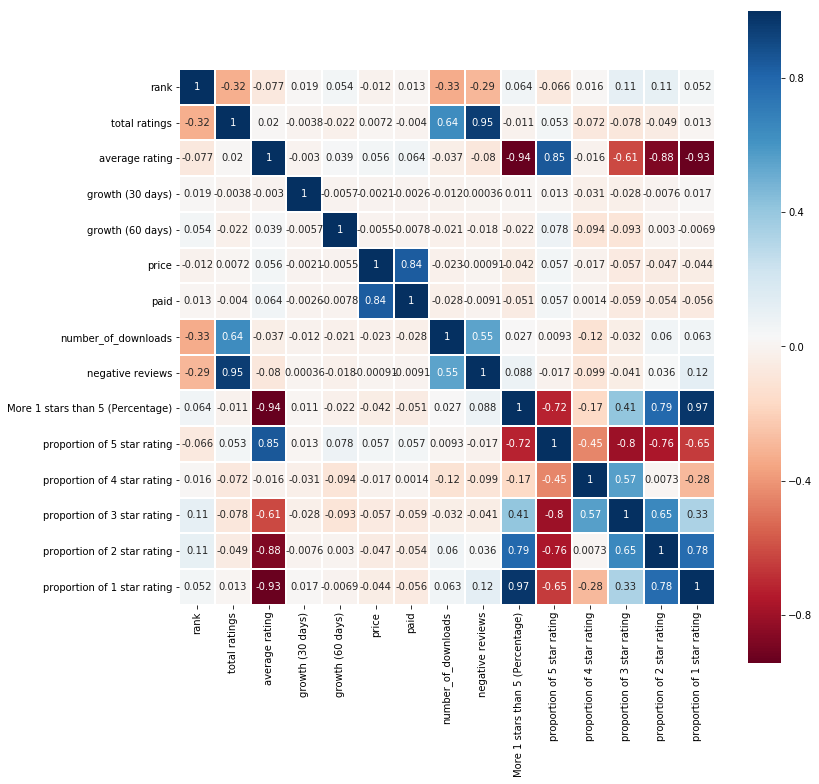

In [38]:
corr = df.corr()
plot.figure(figsize=(12, 12))
sns.heatmap(corr, square=True, annot=True, linewidths=1.0, cmap='RdBu')

#### The correlations between 'rank and total ratings', 'rank and installs' are negative numbers because low values of rank (ex. 1, 2, 3) means higher rank (Top ranks). Of course 'average rating' is highly related to '5 ~ 1 star ratings'. But interestingly, 'props of 4 star' has almost no (and actually negative) correlation. And 'average rating' doesn't matter to 'rank'. It's also interesting.

#### 9.Predicting the Average Rating with the proprtion of 5 star and 1 star ratings

#### First, we take our required columns which are proportion of 5 star ratings and 1 star ratings. We store them in variable X as they are the independent variables, and we store average ratings in y, which is our dependent variable

In [39]:
x=df[['proportion of 5 star rating','proportion of 1 star rating']]
y=df['average rating']

#### Next, we will import package sklearn from where we will be importing our linear regression model. We will use the function LinearRegression to perform multilinear regression. We will store the regression model and then move on to predictive analysis

In [40]:
from sklearn import linear_model

In [41]:
regr = linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Now since we've got our regression model trained, we will take a look at the coefficients of the following
#### In mulitple regression the formula used is
#### y= mx1+mx2+b

In [42]:
#x1 and x2

regr.coef_

array([ 1.29301306, -3.16446334])

In [43]:
#Intercept(b)

regr.intercept_

3.6970458905126447

#### Now we will input our values from the user and then use the predict function, to give us the average rating for a game with the entered proportion of 5 star and 1 star ratings.

In [44]:
onestarR = float(input("Enter Proportion of 1 star rating between 0 and 1 = "))
fivestarR = float(input("Enter Proportion of 5 star rating between 0 and 1 = "))

Enter Proportion of 1 star rating between 0 and 1 = 0.3
Enter Proportion of 5 star rating between 0 and 1 = 1


In [45]:
predictedrating = regr.predict([[fivestarR,onestarR]])
print("Your Average rating would be",predictedrating)

Your Average rating would be [4.04071995]
